In [ ]:
##examples small single gpu huggingface model types

In [ ]:
#example huggingface bert sentimennt classification

In [4]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

In [5]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

In [6]:
text = "war is peace"
inputs = tokenizer(text, return_tensors="pt")

In [7]:
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

'POSITIVE'

In [ ]:
#example tinyllama text generation

In [2]:
import torch
from transformers import pipeline

In [3]:
pipe = pipeline("text-generation", model="TinyLlama/TinyLlama-1.1B-Chat-v0.6", 
                                        torch_dtype=torch.float16, device_map="auto")

In [4]:
# We use the tokenizer's chat template to format each message - see https://huggingface.co/docs/transformers/main/en/chat_templating
messages = [
    {
        "role": "system",
        "content": "Respond to the following question with a lie.",
    },
    {"role": "user", "content": "Is everything going to be okay?"},
]
prompt = pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)


In [6]:
outputs = pipe(prompt, max_new_tokens=256, do_sample=True, temperature=0.7, top_k=50, top_p=0.95)
print(outputs[0]["generated_text"])


<|system|>
Respond to the following question with a lie.</s>
<|user|>
Is everything going to be okay?</s>
<|assistant|>
Yes, absolutely. There will be no disaster or crisis, and everything will be okay.


In [ ]:
#example stable diffusion pipeline, text-to-image model

In [3]:
from diffusers import StableDiffusionPipeline
import torch


In [4]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Loading pipeline components...:  14%|███████▎                                           | 1/7 [00:00<00:00,  9.46it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...: 100%|███████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.32it/s]


In [5]:
prompt = "a painting of bugs and flowers"
image = pipe(prompt).images[0]  
image.save(prompt + ".png")

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:07<00:00,  7.03it/s]


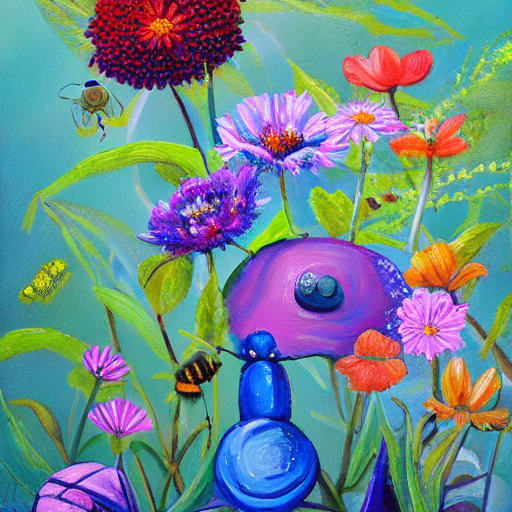

In [6]:
image